In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('data_cleaned.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_4368\2599512217.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


In [36]:
df_small = df.sample(n=400, random_state=42)

In [37]:
X = df_small.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = df_small['TotalPremium']

In [38]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [39]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  
])

In [40]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [44]:
X[categorical_features] = X[categorical_features].astype(str)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [46]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

c:\Users\USER\Documents\OPLearning\10_Academy\Week_3\ven\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\USER\Documents\OPLearning\10_Academy\Week_3\ven\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [48]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [49]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [50]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R2 Score: {r2}\n")

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Linear Regression - Mean Squared Error: 13851.989876513402
Linear Regression - R2 Score: 0.5097516603859795

Random Forest - Mean Squared Error: 17160.508043610214
Random Forest - R2 Score: 0.39265689259725967

XGBoost - Mean Squared Error: 21359.663479913088
XGBoost - R2 Score: 0.24404077326850115



In [62]:
def plot_feature_importance(model, X_train_transformed, model_name):
    importance = model.feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    
    
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False).head(10)
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    
    
    plt.title(f'{model_name} Top 10 Most Important Features')
    plt.xlabel('Normalized Importance Score')
    plt.ylabel('Features')
    
    
    plt.xticks(rotation=90)
    
    
    for i, v in enumerate(feature_importance_df['Importance']):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
  
    plt.tight_layout()
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4368\173436924.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


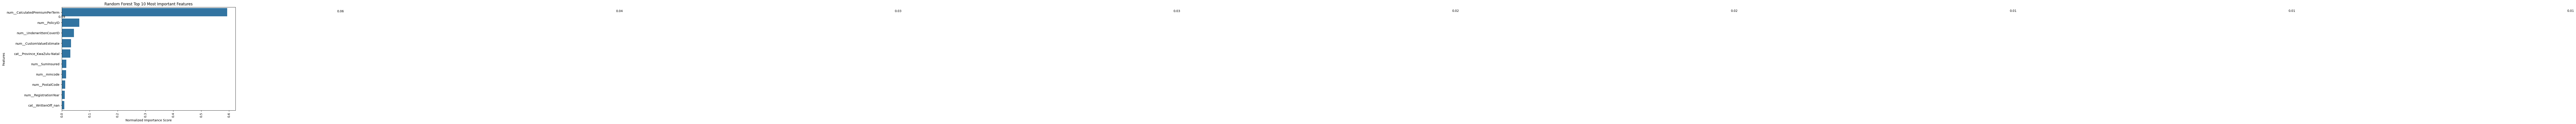

C:\Users\USER\AppData\Local\Temp\ipykernel_4368\173436924.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


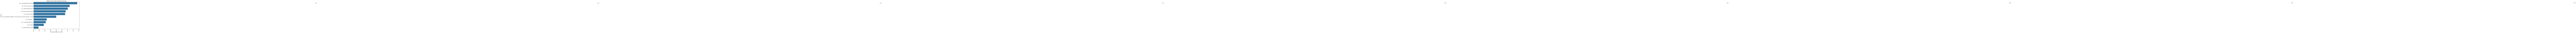

In [63]:
plot_feature_importance(rf_model, X_train, 'Random Forest')
plot_feature_importance(xgb_model, X_train, 'XGBoost')

In [64]:
print("Model Comparison:")
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Model Comparison:
Linear Regression - Mean Squared Error: 13851.989876513402
Linear Regression - R2 Score: 0.5097516603859795

Random Forest - Mean Squared Error: 17160.508043610214
Random Forest - R2 Score: 0.39265689259725967

XGBoost - Mean Squared Error: 21359.663479913088
XGBoost - R2 Score: 0.24404077326850115

